In [1]:
import pandas as pd
import numpy as np

raw_data = pd.read_csv(r"C:\Users\piazz\Documents\ProjetFootPlayer\FootballPlayerStats.csv", sep = ';', encoding = 'ISO-8859-1')
pd.set_option('display.max_columns', None)
football_stats = raw_data.copy()

df_football_stats = pd.DataFrame()

df_football_stats['Player'] = football_stats['Player']
df_football_stats['Player'] = df_football_stats['Player'].str.replace(' ', '-')
df_football_stats['Nation'] = football_stats['Nation']
df_football_stats['Pos'] = football_stats['Pos']
df_football_stats['SoT%'] = football_stats['SoT%']
df_football_stats['Squad'] = football_stats['Squad']
df_football_stats['Comp'] = football_stats['Comp']
df_football_stats['Age'] = football_stats['Age']
df_football_stats['MP'] = football_stats['MP']
df_football_stats['G/90'] = football_stats['Goals']
df_football_stats['G/Sh'] = football_stats['G/Sh']
df_football_stats['G/SoT'] = football_stats['G/SoT']
df_football_stats['PKGoals'] = ((football_stats['ShoPK'] * football_stats['Min']) / 90).round(0).astype(int)
df_football_stats['PKAttempted'] = ((football_stats['PKatt'] * football_stats['Min']) / 90).round(0).astype(int)
df_football_stats['Goals'] = ((football_stats['Goals'] * football_stats['Min']) / 90).round(0).astype(int)
df_football_stats['Pass'] = ((football_stats['PasTotAtt'] * football_stats['Min']) / 90).round(0).astype(int)
df_football_stats['PassCompleted'] = ((football_stats['PasTotCmp'] * football_stats['Min']) / 90).round(0).astype(int)
df_football_stats['PassComp%'] = ((df_football_stats['PassCompleted'] / df_football_stats['Pass']) * 100).round(2)
df_football_stats['PasShoCmp%'] = football_stats['PasShoCmp%']
df_football_stats['PasMedCmp%'] = football_stats['PasMedCmp%']
df_football_stats['PasLonCmp%'] = football_stats['PasLonCmp%']
df_football_stats['Assist'] = ((football_stats['Assists'] * football_stats['Min']) / 90).round(0).astype(int)
df_football_stats['Cross'] = ((football_stats['PasCrs'] * football_stats['Min']) / 90).round(0).astype(int)
df_football_stats['CrossCompleted'] = ((football_stats['CrsPA'] * football_stats['Min']) / 90).round(0).astype(int)
df_football_stats['CrossComp%'] = ((df_football_stats['CrossCompleted'] / df_football_stats['Cross']) * 100).round(2)
df_football_stats['Tackle_Won'] = ((football_stats['TklWon'] * football_stats['Min']) / 90).round(0).astype(int)
df_football_stats['Interception '] = football_stats['PasInt']
df_football_stats['SucDribble'] = ((football_stats['DriSucc'] * football_stats['Min']) / 90).round(0).astype(int)
df_football_stats['Dribble'] = ((football_stats['DriAtt'] * football_stats['Min']) / 90).round(0).astype(int)
df_football_stats['DribbleComp%'] = ((df_football_stats['SucDribble'] / df_football_stats['Dribble']) * 100).round(2)
df_football_stats['DribblePast%'] = ((football_stats['DriPast'] / df_football_stats['Dribble']) * 100).round(2)
df_football_stats['YCards'] = ((football_stats['CrdY'] * football_stats['Min']) / 90).round(0).astype(int)
df_football_stats['RCards'] = ((football_stats['CrdR'] * football_stats['Min']) / 90).round(0).astype(int)
df_football_stats['Fls'] = ((football_stats['Fls'] * football_stats['Min']) / 90).round(0).astype(int)
df_football_stats['Fld'] = ((football_stats['Fld'] * football_stats['Min']) / 90).round(0).astype(int)
df_football_stats['OGoals'] = ((football_stats['OG'] * football_stats['Min']) / 90).round(0).astype(int)
df_football_stats['AerWon'] = ((football_stats['AerWon'] * football_stats['Min']) / 90).round(0).astype(int)
df_football_stats['AerLost'] = ((football_stats['AerLost'] * football_stats['Min']) / 90).round(0).astype(int)
df_football_stats['AerWon%'] = ((football_stats['AerWon'] / (football_stats['AerWon'] + football_stats['AerLost'])) * 100).round(2)
df_football_stats['AerLost%'] = ((football_stats['AerLost'] * football_stats['AerLost']) / 90).round(0).astype(int)
df_football_stats['PasswHead'] = ((football_stats['PaswHead'] * football_stats['Min']) / 90).round(0).astype(int)
df_football_stats['PasswHead%'] = ((df_football_stats['PasswHead'] / df_football_stats['Pass']) * 100).round(2)
df_football_stats['PKwon'] = football_stats['PKwon']


In [2]:
# Data Attaquant :
atq = df_football_stats[(df_football_stats.Pos.str.startswith('FW'))]

In [3]:
atq.head(30)

,Player,Nation,Pos,SoT%,Squad,Comp,Age,MP,G/90,G/Sh,G/SoT,PKGoals,PKAttempted,Goals,Pass,PassCompleted,PassComp%,PasShoCmp%,PasMedCmp%,PasLonCmp%,Assist,Cross,CrossCompleted,CrossComp%,Tackle_Won,Interception,SucDribble,Dribble,DribbleComp%,DribblePast%,YCards,RCards,Fls,Fld,OGoals,AerWon,AerLost,AerWon%,AerLost%,PasswHead,PasswHead%,PKwon
4,Charles-Abi,FRA,FW,0.0,Saint-Étienne,Ligue 1,22.0,1,0.00,0.00,0.00,0,0,0,6,2,33.33,50.0,33.3,0.0,0,1,0,0.00,0,4.00,0,0,NaN,NaN,0,0,1,0,0,1,0,100.00,0,0,0.00,0.00
5,Dickson-Abiama,NGA,FW,22.2,Greuther Fürth,Bundesliga,23.0,24,0.00,0.00,0.00,0,0,0,139,90,64.75,69.2,65.8,50.0,1,2,0,0.00,7,0.62,6,18,33.33,4.78,3,0,18,12,0,22,40,35.51,0,19,13.67,0.00
6,Matthis-Abline,FRA,FW,0.0,Rennes,Ligue 1,19.0,7,0.00,0.00,0.00,0,0,0,10,8,80.00,66.7,100.0,0.0,0,1,0,0.00,0,0.91,1,2,50.00,45.50,0,0,2,1,0,0,2,0.00,0,0,0.00,0.00
7,Tammy-Abraham,ENG,FW,34.4,Roma,Serie A,24.0,37,0.50,0.15,0.44,3,3,17,692,500,72.25,76.2,69.2,80.0,4,24,4,16.67,22,1.02,37,76,48.68,1.50,9,0,43,50,0,82,99,45.27,0,66,9.54,0.03
13,Che-Adams,SCO,FW,49.0,Southampton,Premier League,25.0,30,0.31,0.14,0.29,0,0,7,483,335,69.36,77.9,74.8,56.6,3,11,1,9.09,9,1.15,14,33,42.42,2.27,0,0,31,47,0,56,111,33.56,0,28,5.80,0.00
15,Sargis-Adamyan,ARM,FWMF,66.7,Hoffenheim,Bundesliga,29.0,13,0.27,0.33,0.50,0,0,1,97,72,74.23,84.4,76.3,62.5,0,6,2,33.33,8,1.35,6,9,66.67,18.00,0,0,6,9,0,5,13,27.78,0,7,7.22,0.00
17,Amine-Adli,FRA,FWMF,50.0,Leverkusen,Bundesliga,22.0,25,0.21,0.08,0.16,0,0,3,518,391,75.48,84.1,75.1,45.2,2,26,8,30.77,25,2.79,24,45,53.33,4.29,3,0,27,32,0,19,35,35.23,0,12,2.32,0.00
20,Felix-Afena-Gyan,GHA,FWMF,38.9,Roma,Serie A,19.0,17,0.27,0.11,0.29,0,0,2,165,125,75.76,81.1,80.8,55.6,0,8,2,25.00,4,1.35,9,23,39.13,5.87,5,1,15,26,0,9,18,33.42,0,1,0.61,0.00
26,Sergio-Agüero,ARG,FW,16.7,Barcelona,La Liga,33.0,4,0.59,0.17,1.00,0,0,1,42,31,73.81,72.0,66.7,100.0,0,4,0,0.00,1,0.00,1,1,100.00,59.00,0,0,1,2,0,4,2,66.57,0,3,7.14,0.00
28,Álvaro-Aguirre,ESP,FW,0.0,Rayo Vallecano,La Liga,22.0,1,0.00,0.00,0.00,0,0,0,2,2,100.00,100.0,0.0,0.0,0,0,0,NaN,1,0.00,0,0,NaN,NaN,0,0,0,0,0,0,0,NaN,0,0,0.00,0.00


In [4]:
#Liste Tir
liste_quantile_ButParTir = atq['G/Sh'].quantile(np.linspace(0, 1, 100))
liste_quantile_ButParTirCadre = atq['G/SoT'].quantile(np.linspace(0, 1, 100))
liste_quantile_ButPar90min = atq['G/90'].quantile(np.linspace(0, 1, 100))

#Liste Tete
liste_quantile_TeteReussi = atq['AerWon%'].quantile(np.linspace(0, 1, 100))
liste_quantile_PasseAvecTete = atq['PasswHead%'].quantile(np.linspace(0, 1, 100))

#Liste Passe
liste_quantile_PassShortComp = atq['PasShoCmp%'].quantile(np.linspace(0, 1, 100))
liste_quantile_PassMediumComp = atq['PasMedCmp%'].quantile(np.linspace(0, 1, 100))
liste_quantile_PassLongComp = atq['PasLonCmp%'].quantile(np.linspace(0, 1, 100))

#Liste Dribble
liste_quantile_DribbleComp = atq['DribbleComp%'].quantile(np.linspace(0, 1, 100))
liste_quantile_DribblePast = atq['DribblePast%'].quantile(np.linspace(0, 1, 100))

In [5]:
#Attribution des points
def calc_quantile(value,liste_quantile):
    for idx2, value_quantile in enumerate(liste_quantile):
        if value < value_quantile:
            return idx2
    return 100

In [6]:
##Calcul score tir
atq["but_par_tir"] = atq['G/Sh'].apply(lambda row: calc_quantile(row, liste_quantile_ButParTir))
atq["but_par_tir_cadre"] = atq['G/SoT'].apply(lambda row: calc_quantile(row, liste_quantile_ButParTirCadre))
atq["but_par_90min"] = atq['G/90'].apply(lambda row: calc_quantile(row, liste_quantile_ButPar90min))
##Calcul Score Passe
atq["pass_short_comp"]=atq['PasShoCmp%'].apply(lambda row: calc_quantile(row,liste_quantile_PassShortComp))
atq["pass_medium_comp"]=atq['PasMedCmp%'].apply(lambda row: calc_quantile(row,liste_quantile_PassMediumComp))
atq["pass_long_comp"]=atq['PasLonCmp%'].apply(lambda row: calc_quantile(row,liste_quantile_PassLongComp))
##Calcul Score Tete
atq["tete_reussi"]=atq['AerWon%'].apply(lambda row: calc_quantile(row,liste_quantile_TeteReussi))
atq["passe_avec_tete"]=atq['PasswHead%'].apply(lambda row: calc_quantile(row,liste_quantile_PasseAvecTete))
# dribble
atq["Dribbles_reussis"]=atq['DribbleComp%'].apply(lambda row: calc_quantile(row,liste_quantile_DribbleComp))
atq["Dribles_passes"]=atq['DribblePast%'].apply(lambda row: calc_quantile(row,liste_quantile_DribblePast))


C:\Users\piazz\AppData\Local\Temp\ipykernel_4592\2223183376.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  atq["but_par_tir"] = atq['G/Sh'].apply(lambda row: calc_quantile(row, liste_quantile_ButParTir))
C:\Users\piazz\AppData\Local\Temp\ipykernel_4592\2223183376.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  atq["but_par_tir_cadre"] = atq['G/SoT'].apply(lambda row: calc_quantile(row, liste_quantile_ButParTirCadre))
C:\Users\piazz\AppData\Local\Temp\ipykernel_4592\2223183376.py:4: SettingWithCopyW

In [7]:
def calculate_score(row, list_features:list):
    coef = min(0.5 + 0.5 * (row["MP"] / 30), 1)
    score = row[list_features].sum() / len(list_features)
    return round(score * coef)

In [8]:
## Notes par stats 
atq["Tir"]=atq.apply(lambda row: calculate_score(row,["but_par_tir_cadre","but_par_tir","but_par_90min"]), axis=1)
atq["Tete"]=atq.apply(lambda row:calculate_score(row,["tete_reussi" , "passe_avec_tete"]) , axis=1)
atq["Passe"]=atq.apply(lambda row:calculate_score(row,["pass_short_comp","pass_medium_comp","pass_long_comp"]), axis=1)
atq["Dribbles"]=atq.apply(lambda row:calculate_score(row,["Dribbles_reussis","Dribles_passes"]), axis=1)

##Note finale 
atq["Note Finale"] = round((atq[["Tir", "Tete", "Passe", "Dribbles"]].mean(axis=1)))

C:\Users\piazz\AppData\Local\Temp\ipykernel_4592\2628724423.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  atq["Tir"]=atq.apply(lambda row: calculate_score(row,["but_par_tir_cadre","but_par_tir","but_par_90min"]), axis=1)
C:\Users\piazz\AppData\Local\Temp\ipykernel_4592\2628724423.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  atq["Tete"]=atq.apply(lambda row:calculate_score(row,["tete_reussi" , "passe_avec_tete"]) , axis=1)
C:\Users\piazz\AppData\Local\Temp\ipykernel_4592\2628724423.py:4: Setting

In [24]:
Stats_atq = atq.drop(columns=["G/90","G/Sh","G/SoT","PKAttempted","Pass","PassCompleted","PassComp%","PasShoCmp%","PasMedCmp%","PasLonCmp%","Assist","Cross","CrossCompleted","CrossComp%","Tackle_Won","SucDribble","Dribble","DribbleComp%","YCards","RCards","Fls","Fld","OGoals","AerWon","AerLost","AerWon%","AerLost","AerLost%","PasswHead","PasswHead%","PKwon","but_par_tir","but_par_tir_cadre","but_par_90min","tete_reussi","passe_avec_tete","pass_short_comp","pass_medium_comp","pass_long_comp","DribblePast%","Dribbles_reussis","Dribles_passes"])

In [27]:
Stats_atq.sort_values('Note Finale', ascending = False).head(20)

,Player,Nation,Pos,SoT%,Squad,Comp,Age,MP,PKGoals,Goals,Interception,Tir,Tete,Passe,Dribbles,Note Finale
1098,Sehrou-Guirassy,GUI,FW,37.8,Rennes,Ligue 1,26.0,37,0,9,0.88,93,78,70,76,79.0
2852,Yoane-Wissa,COD,FWMF,39.4,Brentford,Premier League,25.0,30,0,7,1.05,90,80,45,74,72.0
1307,Juanmi,ESP,FW,54.5,Betis,La Liga,29.0,33,0,16,1.22,94,56,77,55,70.0
2633,Martin-Terrier,FRA,FWMF,50.6,Rennes,Ligue 1,25.0,37,2,21,1.13,90,66,76,47,70.0
325,Myron-Boadu,NED,FW,38.1,Monaco,Ligue 1,21.0,31,0,4,0.84,84,41,73,78,69.0
1355,Moise-Kean,ITA,FW,35.7,Juventus,Serie A,22.0,32,0,5,0.57,85,72,61,56,68.0
2418,Gianluca-Scamacca,ITA,FW,46.2,Sassuolo,Serie A,23.0,36,1,16,0.92,87,80,57,46,68.0
1804,Rafa-Mir,ESP,FW,36.1,Sevilla,La Liga,24.0,34,0,10,0.65,84,87,40,56,67.0
1944,Christopher-Nkunku,FRA,FWMF,48.8,RB Leipzig,Bundesliga,24.0,34,1,20,1.35,91,52,74,50,67.0
49,Lucas-Alario,ARG,FW,56.5,Leverkusen,Bundesliga,29.0,27,0,6,1.10,87,64,30,82,66.0


In [24]:
#Exporter le dataframe en CSV
atq.sort_values('Note Finale', ascending = False).to_csv('NotesAtq.csv', index=False)


In [33]:
jong = Stats_atq[(Stats_atq.Player == "Robert-Lewandowski")]

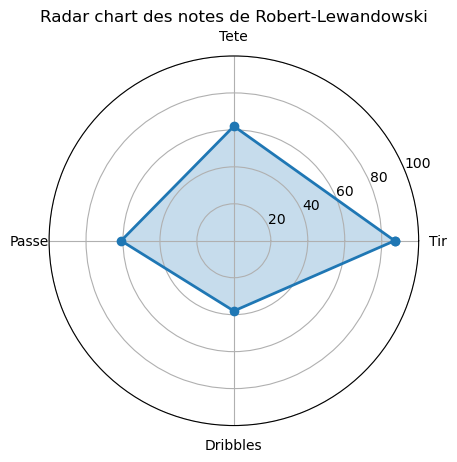

In [42]:
import matplotlib.pyplot as plt
from math import pi

# Sélectionner les notes de Robert
jong = Stats_atq[(Stats_atq.Player == "Robert-Lewandowski")]

# Créer une liste avec les noms des notes
categories = ['Tir', 'Tete', 'Passe', 'Dribbles']

# Créer une liste avec les valeurs de chaque note, normalisées sur une échelle de 0 à 100
values = jong.loc[:, categories].values.tolist()[0]

# Ajouter la première valeur à la fin de la liste pour fermer le graphique
values += values[:1]

# Créer un array avec les angles de chaque axe
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

# Initialiser le graphique en polar
ax = plt.subplot(111, polar=True)

# Dessiner le polygone en utilisant les valeurs et les angles
ax.plot(angles, values, 'o-', linewidth=2)

# Remplir le polygone avec une couleur transparente
ax.fill(angles, values, alpha=0.25)

# Ajouter des labels aux axes
ax.set_thetagrids([a * 180 / pi for a in angles[:-1]], categories)

# Définir la limite maximale des axes à 100
ax.set_ylim([0, 100])

# Afficher le titre du graphique avec le nom de Robert
plt.title("Radar chart des notes de Robert-Lewandowski")

# Afficher le graphique
plt.show()

In [17]:
# trier le dataframe par équipe et note
df = Stats_atq.sort_values(['Squad', 'Note Finale'], ascending=False)

# ajouter une colonne pour la note attribuée pour chaque joueur
df['note_attribuee'] = 0

# attribuer les notes pour chaque joueur en fonction de son équipe
for equipe in df['Squad'].unique():
    equipe_df = df[df['Squad'] == equipe]
    i = 1
    for index, row in equipe_df.iterrows():
        df.at[index, 'note_attribuee'] = i
        i += 1


In [20]:
Stats_atq[(Stats_atq.Squad == "Rennes")]

,Player,Nation,Pos,SoT%,Squad,Comp,Age,MP,Interception,Tir,Tete,Passe,Dribbles,Note Finale,note_attribuee
1098,Sehrou-Guirassy,GUI,FW,37.8,Rennes,Ligue 1,26.0,37,0.88,93,78,70,76,79.0,1
2633,Martin-Terrier,FRA,FWMF,50.6,Rennes,Ligue 1,25.0,37,1.13,90,66,76,47,70.0,2
355,Benjamin-Bourigeaud,FRA,FWMF,38.9,Rennes,Ligue 1,28.0,38,2.48,83,30,66,20,50.0,3
1453,Gaëtan-Laborde,FRA,FW,38.6,Rennes,Ligue 1,28.0,34,0.99,69,69,40,16,48.0,4
747,Jeremy-Doku,BEL,FWMF,40.0,Rennes,Ligue 1,20.0,14,1.73,56,24,37,60,44.0,5
2620,Loum-Tchaouna,FRA,FWMF,50.0,Rennes,Ligue 1,18.0,10,2.00,22,63,22,35,36.0,6
2623,Mathys-Tel,FRA,FWMF,33.3,Rennes,Ligue 1,17.0,7,5.00,21,54,24,34,33.0,7
6,Matthis-Abline,FRA,FW,0.0,Rennes,Ligue 1,19.0,7,0.91,21,6,26,46,25.0,8
